In [2]:
pip install opencv-python



  Using cached opencv_python-4.10.0.84-cp37-abi3-win_amd64.whl.metadata (20 kB)
Using cached opencv_python-4.10.0.84-cp37-abi3-win_amd64.whl (38.8 MB)


In [4]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf 
from tensorflow.keras.models import Sequential
import cv2
import os
import seaborn as sns
from tensorflow.keras.layers import Dense , Conv2D , MaxPooling2D , Flatten

In [1]:
import os
import cv2
import numpy as np

labels = ['Negative', 'Positive']

def read_image(data_dir):
    data = []
    labels_list = []
    for label in labels:
        path = os.path.join(data_dir, label)
        class_num = labels.index(label)
        for img in os.listdir(path):
            try:
                img_arr = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
                if img_arr is None:
                    print(f"Image {os.path.join(path, img)} not read correctly.")
                    continue
                resized_arr = cv2.resize(img_arr, (120, 120))
                data.append(resized_arr)
                labels_list.append(class_num)
            except Exception as e:
                print(f"Error processing {os.path.join(path, img)}: {e}")
    return np.array(data), np.array(labels_list)

# Usage example
dataset, labels = read_image(r"C:\Users\jadav\crack_detection_images")
print(f"Dataset shape: {dataset.shape}")
print(f"Labels shape: {labels.shape}")


Image C:\Users\jadav\crack_detection_images\Negative\desktop.ini not read correctly.
Image C:\Users\jadav\crack_detection_images\Negative\output.csv not read correctly.
Image C:\Users\jadav\crack_detection_images\Negative\output_2.csv not read correctly.
Dataset shape: (40000, 120, 120)
Labels shape: (40000,)


In [5]:
x = dataset
y = labels
x = np.array(x).reshape(-1 , 120 , 120 , 1)
x = x/255
y = np.array(y)

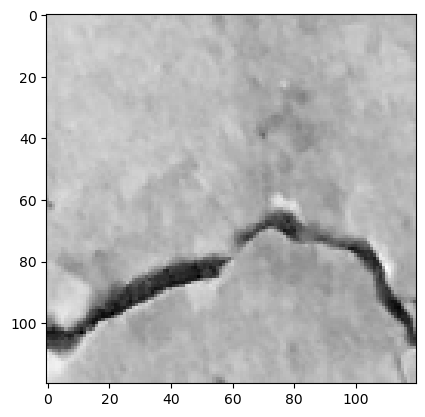

In [6]:
# Displaying Images 
import random
idx = random.randint(0, 40000)
plt.imshow(x[idx , :],cmap = 'gray')
                    

In [8]:
# Building cnn model
model = Sequential([
    Conv2D (64,3 , activation ='relu',input_shape = x.shape[1:]),
    MaxPooling2D(),
    
    Conv2D (64,3 , activation ='relu'),
    MaxPooling2D(),
    
    Conv2D (128,3 , activation ='relu'),
    MaxPooling2D(),
    
    Flatten(),
    Dense(units = 256 , activation = 'relu'),
    Dense(units = 2 , activation = 'softmax')
])
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)                    │ (None, 118, 118, 64)        │             640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 59, 59, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 57, 57, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 28, 28, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 26, 26, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 13, 13, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 21632)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 256)                 │       5,538,048 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 2)                   │             514 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 5,649,986 (21.55 MB)

 Trainable params: 5,649,986 (21.55 MB)

 Non-trainable params: 0 (0.00 B)

# Compile model


In [9]:
model.compile(
    optimizer = tf.keras.optimizers.Adam(learning_rate = 0.0001),
    loss = tf.keras.losses.sparse_categorical_crossentropy,
    metrics = ['accuracy']
    
)

In [ ]:
model.fit(x , y, epochs = 15 )